In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [2]:
# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
# Perform PCA to reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [4]:
# Split the data into two sets for demonstration purposes
A = X_pca[:75]
B = X_pca[75:]

In [5]:
# Add some noise to A
noise = np.random.normal(0, 0.1, A.shape)
A_noisy = A + noise

In [6]:
# Centralize the data
A_mean = np.mean(A_noisy, axis=0)
B_mean = np.mean(B, axis=0)
A_centered = A_noisy - A_mean
B_centered = B - B_mean

In [7]:
# Perform SVD
U, _, Vt = np.linalg.svd(np.dot(B_centered.T, A_centered))
R = np.dot(U, Vt)

In [8]:
# Transform A using the orthogonal matrix R
A_transformed = np.dot(A_centered, R) + B_mean

In [9]:
# Calculate the midpoints
midpoints = (A_transformed + B) / 2

In [10]:
# Calculate the direction vector of the line
direction_vector = np.mean(A_transformed - B, axis=0)

In [11]:
# Define a function to plot the decision boundary
def plot_decision_boundary(midpoints, direction_vector):
    x_vals = np.linspace(midpoints[:, 0].min(), midpoints[:, 0].max(), 100)
    y_vals = np.linspace(midpoints[:, 1].min(), midpoints[:, 1].max(), 100)
    
    # Create a meshgrid
    xx, yy = np.meshgrid(x_vals, y_vals)
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    # Calculate the distance to the midpoints
    dist = np.dot(grid - midpoints.mean(axis=0), direction_vector)
    dist = dist.reshape(xx.shape)
    
    return xx, yy, dist

In [12]:
# Recover the original A from the transformed A
A_recovered = np.dot(A_transformed - B_mean, R.T) + A_mean

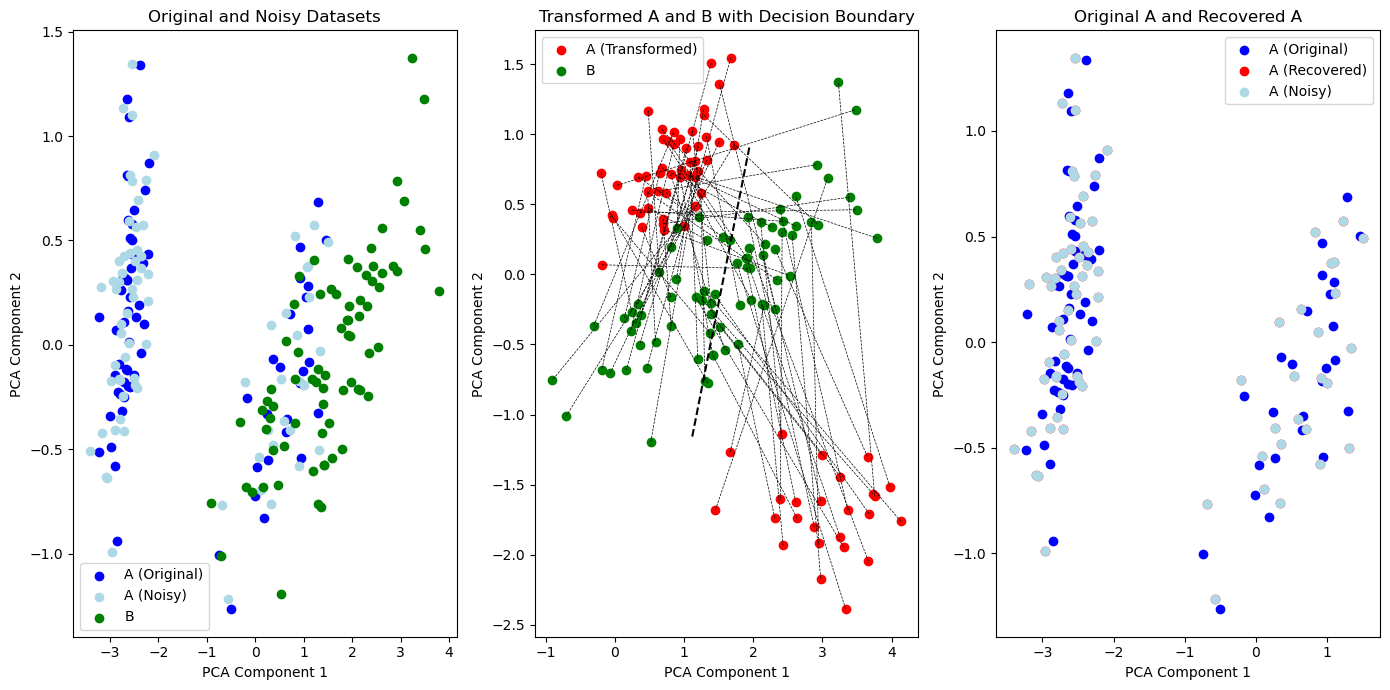

In [13]:
# Plot original, noisy, transformed, and recovered datasets
plt.figure(figsize=(14, 7))

# Original datasets
plt.subplot(1, 3, 1)
plt.scatter(A[:, 0], A[:, 1], c='blue', label='A (Original)')
plt.scatter(A_noisy[:, 0], A_noisy[:, 1], c='lightblue', label='A (Noisy)')
plt.scatter(B[:, 0], B[:, 1], c='green', label='B')
plt.title('Original and Noisy Datasets')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()

# Transformed A and B with connecting lines
plt.subplot(1, 3, 2)
plt.scatter(A_transformed[:, 0], A_transformed[:, 1], c='red', label='A (Transformed)')
plt.scatter(B[:, 0], B[:, 1], c='green', label='B')

# Draw lines between original B and transformed A points
for i in range(len(A_transformed)):
    plt.plot([A_transformed[i, 0], B[i, 0]], [A_transformed[i, 1], B[i, 1]], 'k--', linewidth=0.5)

# Plot the decision boundary
xx, yy, dist = plot_decision_boundary(midpoints, direction_vector)
plt.contour(xx, yy, dist, levels=[0], colors='black', linestyles='dashed')

plt.title('Transformed A and B with Decision Boundary')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()

# Plot original A and recovered A
plt.subplot(1, 3, 3)
plt.scatter(A[:, 0], A[:, 1], c='blue', label='A (Original)')
plt.scatter(A_recovered[:, 0], A_recovered[:, 1], c='red', label='A (Recovered)')
plt.scatter(A_noisy[:, 0], A_noisy[:, 1], c='lightblue', label='A (Noisy)')
plt.title('Original A and Recovered A')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()

plt.tight_layout()
plt.show()